In [1]:
import sys, os
%matplotlib inline 
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
#sys.path.append("/Volumes/k2_data/swarced") #assumes k2_data is mounted
#import swarced as sw

In [2]:
'''This will search through the file and return the east and west pair if there is one or both or "0", "0" 
if none, given epic id and campaign 
In code, epicID and campaign should be integers'''
kelt_path = "/Volumes/kelt_data/"
matched_c0 = ascii.read(kelt_path + "matched_c0.dat")
matched_c2 = ascii.read(kelt_path + "matched_c2.dat")
def get_kelt(epic_id, campaign):
    #epic_id, campaign = str(epic_id), str(campaign)
    if campaign == 0:
        if epic_id in matched_c0['col1']:
            locat = np.argmax(matched_c0['col1'] == epic_id)
            return [matched_c0[locat]['col5'], matched_c0[locat]['col6']]
        else: #not in match
            return "0", "0"
    elif campaign == 1:
        return "0", "0"
    elif campaign == 2:
        if epic_id in matched_c2['col1']:
            locat = np.argmax(matched_c2['col1'] == epic_id)
            return [matched_c2[locat]['col5'], matched_c2[locat]['col6']]
        else: #not in match
            return "0", "0"
    else: #not in campaign 0, 1, or 2
        return "0", "0"

In [3]:
'0' in get_kelt(202499459, 2)

True

In [4]:
'nan' in get_kelt(202522885, 2)

True

In [5]:
r = get_kelt(202909059 , 2)
r[(r.index("nan") + 1 ) % 2]

'KELT_S26_lc_000021_V01_west_raw.dat'

In [ ]:
'''This will plot the data of either the paired east and west data sets or the single east or west data set. It will 
print "can't plot" if there was no corresponding filename to the given epic id and campaign'''
def plot_kelt(epic_id, campaign, version='tfa'):
    fn = get_kelt(epic_id, campaign)
    if fn == ("0", "0"):
        print 'Data  not found, plotting not possible'
    elif 'nan' in fn:
        choice = (fn.index("nan") + 1 ) % 2
        if version == 'tfa':
            fn[choice] = "_".join(fn[choice].split("_")[:-1]) + "_tfa.dat"
            
        if_nan = ascii.read(kelt_path +"c" +str(campaign) + "/"+ version +"/"+ fn[choice])
        time, mag, mag_err = if_nan['col1'], if_nan['col2'], if_nan['col3']
        plt.scatter(time, mag/np.median(mag), c='black', label = "east" if choice==0 else "west", lw =0.1)
        plt.title("EPIC " + str(epic_id))
        plt.xlim(min(time), max(time))
        plt.ylim(1 + 0.5*np.std(mag), 1 - 0.5*np.std(mag))
        plt.xlabel('Barycentric Julian Date')
        plt.ylabel('Relative Magnitude')
        plt.legend()
        plt.show()
    else: #it was in the list
        if version == 'tfa':
            fn[0] = "_".join(fn[0].split("_")[:-1]) + "_tfa.dat"
            fn[1] = "_".join(fn[1].split("_")[:-1]) + "_tfa.dat"
    
        east = ascii.read(kelt_path +"c" +str(campaign) + "/"+ version +"/" + fn[0])
        west = ascii.read(kelt_path +"c" +str(campaign) + "/"+ version +"/" + fn[1])
        #time_k2, relflux_k2 = sw.retrieve(epic_id, campaign, inpath="/Volumes/k2_data/lightcurves")
        #mag_k2 = relflux_k2 / np.median(relflux_k2)
        time_e, mag_e, mag_err_e = east['col1'],east['col2'],east['col3']
        time_w, mag_w, mag_err_w = west['col1'],west['col2'],west['col3']
        plt.scatter(time_e, mag_e/np.median(mag_e),c='black',label= 'east', lw=0.1)
        plt.scatter(time_w, mag_w/np.median(mag_w), c="darkgrey",label= 'west', lw=0.1)
        #plt.scatter(time_k2, mag_k2, c=???, ...
        plt.title("EPIC " + str(epic_id))
        plt.xlim(min(time_e), max(time_e))
        plt.ylim(1+0.5*np.std(mag_e), 1-0.5*np.std(mag_e))
        #plt.gca().invert_yaxis()
        plt.xlabel("Barycentric Julian Date")
        plt.ylabel("Relative Magnitude")
        plt.legend()
        plt.show()

In [6]:
'''This will plot the data of either the paired east and west data sets or the single east or west data set. It will 
print "can't plot" if there was no corresponding filename to the given epic id and campaign'''
def plot_kelt(epic_id, campaign, version='tfa'):
    fn = get_kelt(epic_id, campaign)
    if fn == ("0", "0"):
        print 'Data  not found, plotting not possible'
    elif 'nan' in fn:
        choice = (fn.index("nan") + 1 ) % 2
        if version == 'tfa':
            fn[choice] = "_".join(fn[choice].split("_")[:-1]) + "_tfa.dat"
            
        if_nan = ascii.read(kelt_path +"c" +str(campaign) + "/"+ version +"/"+ fn[choice])
        time, mag, mag_err = if_nan['col1'], if_nan['col2'], if_nan['col3']
        plt.scatter(time, mag/np.median(mag), c='black', label = "east" if choice==0 else "west", lw =0.1)
        plt.title("EPIC " + str(epic_id))
        plt.xlim(min(time), max(time))
        plt.ylim(1 + 0.5*np.std(mag), 1 - 0.5*np.std(mag))
        plt.xlabel('Barycentric Julian Date')
        plt.ylabel('Relative Magnitude')
        plt.legend()
        plt.show()
    else: #it was in the list
        if version == 'tfa':
            fn[0] = "_".join(fn[0].split("_")[:-1]) + "_tfa.dat"
            fn[1] = "_".join(fn[1].split("_")[:-1]) + "_tfa.dat"
    
        east = ascii.read(kelt_path +"c" +str(campaign) + "/"+ version +"/" + fn[0])
        west = ascii.read(kelt_path +"c" +str(campaign) + "/"+ version +"/" + fn[1])
        #time_k2, relflux_k2 = sw.retrieve(epic_id, campaign, inpath="/Volumes/k2_data/lightcurves")
        #mag_k2 = relflux_k2 / np.median(relflux_k2)
        time_e, mag_e, mag_err_e = east['col1'],east['col2'],east['col3']
        time_w, mag_w, mag_err_w = west['col1'],west['col2'],west['col3']
        plt.scatter(time_e, mag_e/np.median(mag_e),c='black',label= 'east', lw=0.1)
        plt.scatter(time_w, mag_w/np.median(mag_w), c="darkgrey",label= 'west', lw=0.1)
        #plt.scatter(time_k2, mag_k2, c=???, ...
        plt.title("EPIC " + str(epic_id))
        plt.xlim(min(time_e), max(time_e))
        plt.ylim(1+0.5*np.std(mag_e), 1-0.5*np.std(mag_e))
        #plt.gca().invert_yaxis()
        plt.xlabel("Barycentric Julian Date")
        plt.ylabel("Relative Magnitude")
        plt.legend()
        plt.show()

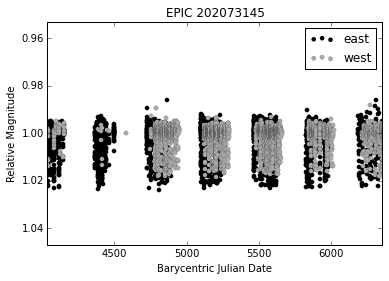

In [10]:
plot_kelt(202073145, 0)

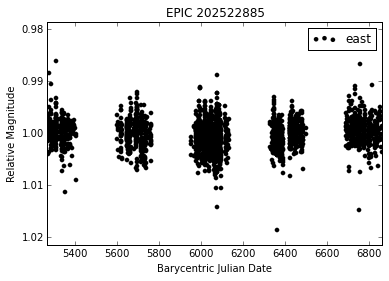

In [8]:
plot_kelt(202522885, 2, version = "raw")

In [9]:
from __future__ import division, print_function
import remove_EB as remEB
def plot_phase(epicID,campaign,period, t0, inpath ="/k2_data/lightcurves/"):
    '''Plots a period folded curve'''
    epicID,campaign = str(epicID),str(campaign)
    time, flux = retrieve(epicID,campaign,inpath)
    fig = pl.figure(figsize=(5 * 1.61803398875,5))
    pl.title("EPIC " + epicID)
    phase = remEB.find_phase(time, period, t0)
    pl.plot((phase + 0.25) % 1 - 0.25,flux,'k.',ms=10)
    pl.xlabel("Phase")
    pl.ylabel("FM15 Flux")
    pl.show()

ImportError: No module named remove_EB